# Walidacja krzyżowa, krzywe ROC

Teoria do tej części znajduje się tu:

https://brain.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wykład_Ocena_jakości_klasyfikacji

### Przygotowanie środowiska programistycznego

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.optimize as so

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

Zestaw uczący pobieramy z repozytorium github i wczytujemy używając klasy Pandas DataFrame. Najpierw pobieramy repozytorium z github. Repozytorium zawiera kod do naszych ćwiczeń, oraz przykładowe dane w katalogu "dane".

```
!git clone https://github.com/akalinow/Uczenie_maszynowe -b 2022_2023
!ln -s /content/Uczenie_maszynowe/dane/ dane
```

In [3]:
df = pd.read_csv("dane/reg_log_data.txt", encoding='latin-1', sep=",", names=["matematyka", "biologia", "wynik"])

**Proszę:**
* skopiować to tego notatnika funkcje do trenowania regresji logistycznej napisane na poprzednich zajęciach:

```Python
logistic_func(theta, x)
log_likelihood(theta, x, y, model)
negative_log_likelihood(theta, x, y, model)
log_likelihood_derivative(theta, x, y, model)
negative_log_likelihood_derivative(theta, x, y, model)
classification(theta, x, model)
```

Oczekiwany wynik (adresy funkcji będą inne niż poniżej):
```Python
<function logistic_func at 0x7f2a697b2a60> <function log_likelihood at 0x7f2a697b2ca0>
<function negative_log_likelihood at 0x7f2a697b28b0> <function log_likelihood_derivative at 0x7f2a697b2ee0>
<function negative_log_likelihood_derivative at 0x7f2a697b2670>
<function classification at 0x7f2a73884940>
Wartość funkcji log-wiarygodności dla zbioru testowego = -69.31471805599453
Wartość pochodnej funkcji log-wiarygodności dla zbioru testowego = [  10.         1200.92165893 1126.28422055]
```

In [4]:

...


print(logistic_func, log_likelihood)
print(negative_log_likelihood, log_likelihood_derivative)
print(negative_log_likelihood_derivative)
print(classification)

theta0 = np.array([0,0,0])
model = logistic_func
llh = log_likelihood(theta0, df[["matematyka","biologia"]], df["wynik"], model)
llh_derivative = log_likelihood_derivative(theta0, df[["matematyka","biologia"]], df["wynik"], model)

print("Wartość funkcji log-wiarygodności dla zbioru testowego = {}".format(llh))
print("Wartość pochodnej funkcji log-wiarygodności dla zbioru testowego = {}".format(llh_derivative))

<function logistic_func at 0x7f91f5cd0a60> <function log_likelihood at 0x7f91f5cd0af0>
<function negative_log_likelihood at 0x7f91f5cd0c10> <function log_likelihood_derivative at 0x7f91f5ce9280>
<function negative_log_likelihood_derivative at 0x7f91f5ce9310>
<function classification at 0x7f91f5ce93a0>
Wartość funkcji log-wiarygodności dla zbioru testowego = -69.31471805599453
Wartość pochodnej funkcji log-wiarygodności dla zbioru testowego = [  10.         1200.92165893 1126.28422055]


### Zastosowanie w naszym przykładzie
Przeprowadzimy kross-walidację typu $leave-one-out$:
po kolei odłożymy po jednym przykładzie ze zbioru uczącego i na takim zredukowanym zbiorze nauczymy regresję, a następnie sprawdzimy 
działanie modelu na odłożonym przykładzie. Kroki są następujące:

* ze zbioru uczącego odrzucamy jeden przykład
* na pozostałych przykładach "trenujemy model", czyli znajdujemy parametry $\theta$
* sprawdzamy działanie modelu na odrzuconym wcześniej przykładzie
* procedurę powtarzamy dla wszystkich przykładów w zbiorze uczącym  


**Proszę:** 

* napisać funkcję ```leave_one_out_CV(df, theta, model)``` która:
    * przyjmuje zestaw uczący w postaci obiektu DataFrame, początkowe wartości parametrów $\theta$, oraz model $model$
    * implementuje algorytm ```leave-one-out``` i tworzy listę wyników modelu dla każdego przykładu:

    ```Python
    passed = np.append(passed, classification(theta_opt, df_left_out[["matematyka","biologia"]], model))
    ```

    * dodaje do obiektu DataFrame kolumnę z wynikami modelu:

```Python
df["model"] = passed 
```   

* uruchomić funkcję na danych i wypisać zawartość zmodyfikowanego obiektu DataFrame. 

Oczekiwany wynik to:
```Python
    matematyka   biologia  wynik  model
0    34.623660  78.024693      0    0.0
1    30.286711  43.894998      0    0.0
2    35.847409  72.902198      0    0.0
3    60.182599  86.308552      1    1.0
4    79.032736  75.344376      1    1.0
..         ...        ...    ...    ...
```

**Wskazówka**: pętla po wszystkich przykładach może użyć indeksu obiektu DataFrame: `df.index`

In [5]:
%%time 

def leave_one_out_CV(df, theta0, model):
    # macierz przechowująca wyniki dla danego modelu
    passed = np.array([])
    # kopia oryginalnych danych
    df_with_model = df.copy()
    
    # pętla po wszystkich przykładach
    for leave_out_index in df.index:
        # 1. stworz dataframe bez jednego przykladu
...
        # 2. znajdz optymalne parametry theta
...
        # 3. stworz dataframe z odrzuconego (pojedynczego) przykladu
...
        # 4. dodaj wynik modelu do poprzednich wynikow 
...
    # dodajemy wyniki modelu do calego data frame
    df_with_model["model"] = passed
    # zwracamy data frame powiekszony o kolumne z wynikami modelu
    return df_with_model
                        
theta0 = np.array([0,0,0])
model = logistic_func 
df_with_model = leave_one_out_CV(df, theta0, model)
print(df_with_model)

    matematyka   biologia  wynik  model
0    34.623660  78.024693      0    0.0
1    30.286711  43.894998      0    0.0
2    35.847409  72.902198      0    0.0
3    60.182599  86.308552      1    1.0
4    79.032736  75.344376      1    1.0
..         ...        ...    ...    ...
95   83.489163  48.380286      1    1.0
96   42.261701  87.103851      1    1.0
97   99.315009  68.775409      1    1.0
98   55.340018  64.931938      1    0.0
99   74.775893  89.529813      1    1.0

[100 rows x 4 columns]
CPU times: user 7.04 s, sys: 26.1 ms, total: 7.07 s
Wall time: 7.06 s


Zdefiniujmy następujące przypadki gdy nasz model się myli lub podaje poprawny wynik:

* **"True Positive" (TP)**:  stan faktyczny jest pozytywny (y=1) i klasyfikator się nie myli (wynik = 1)
* **"True Negative" (TN)**:  stan faktyczny jest negatywny (y=0) i klasyfikator się nie myli (wynik = 0) 
* **"False Positive" (FP)**: wynik fałszywie pozytywny (fałszywy alarm): stan faktyczny jest negatywny (y=0) ale klasyfikator się  myli (wynik = 1)
* **"False Netative" (FN)**: przegapiony alarm: stan faktyczny jest pozytywny (y=1) i klasyfikator się myli (wynik = 0)

**Proszę** napisać kod, który zlicza warianty TP, TN, FP, FN. Dla naszego zbioru uczącego powinniśmy uzyskać:
```Python
TP:  55
FP:  6
TN:  34
FN:  5
```   

**Wskazówka:** 
* proszę użyć metody ```df.shape[0]``` by zliczać liczbę wierszy w odpowiednio przefiltrowanym obiekcie DataFrame
* proszę użyć warunkow logicznych aby wybrać odpowiednie dane i pola `shape[0]` aby dostać liczbę wierszy

In [5]:
...

print("TP = {}\nFP = {}\nTN = {}\nFN = {}".format(tp, fp, tn, fn))

TP = 55
FP = 6
TN = 34
FN = 5


## Krzywa ROC

Aby wykreślić krzywą ROC należy przeprowadzić klasyfikację dla wielu możliwych wartości progu dla hipotezy, powyżej którego uznajemy przypadek za należący do klasy 1. W tym celu należy zmodyfikować funkcję ```leave_one_out_CV(df, theta0, model)``` tak by zapisywała prawdopodobieństwo, a nie wynik działania funkcji ```classification```

**Proszę:** 
* napisać funkcję ```leave_one_out_CV_with_prob(df, theta0, model)``` która zapisuje kolumnę z prawdopodobieństwem zamiast wynikiem klasyfikacji:

```Python
df_with_model["model_prob"] = prob
```
Oczekiwany wynik:
```Python
    matematyka   biologia  wynik  model_prob
0    34.623660  78.024693      0    0.096880
1    30.286711  43.894998      0    0.000042
2    35.847409  72.902198      0    0.045567
3    60.182599  86.308552      1    0.990292
4    79.032736  75.344376      1    0.998191
..         ...        ...    ...         ...
```

In [6]:
%%time 

def leave_one_out_CV_with_prob(df, theta0, model):
    # macierz przechowująca wartość prawdopodobieństwa
    prob = np.array([])
    # kopia oryginalnego zestawu danych
    df_with_model = df.copy()
    # petla po wszystkich przykladach
    for leave_out_index in df.index:
        # 1. stworz dataframe bez jednego przykladu
...
        # 2. znajdz optymalne parametry theta
...
        # 3. stworz dataframe z odrzuconego (pojedynczego) przykladu
...
        # 4. dodajemy wynik modelu do poprzednich
...
    # dodajemy wyniki modelu (prawdopodobienstwa) do calego DataFrame
    df_with_model["model_prob"] = prob
    # zwracamy data frame powiekszony o kolumne z wynikami modelu (prawdopodobienstwami)
    return df_with_model
                        
theta0 = np.array([0,0,0])
model = logistic_func 
df_with_prob = leave_one_out_CV_with_prob(df, theta0, model)
print(df_with_prob)

    matematyka   biologia  wynik  model_prob
0    34.623660  78.024693      0    0.096880
1    30.286711  43.894998      0    0.000042
2    35.847409  72.902198      0    0.045567
3    60.182599  86.308552      1    0.990292
4    79.032736  75.344376      1    0.998191
..         ...        ...    ...         ...
95   83.489163  48.380286      1    0.850267
96   42.261701  87.103851      1    0.721420
97   99.315009  68.775409      1    0.999897
98   55.340018  64.931938      1    0.306823
99   74.775893  89.529813      1    0.999751

[100 rows x 4 columns]
CPU times: user 7.32 s, sys: 5.62 ms, total: 7.33 s
Wall time: 7.32 s


**Proszę:**
* narysować krzywą ROC oraz obliczyć pole pod nią (ang. area under ROC, AUC)

**Wskazówka:**
* do obliczenia AUC proszę użyć funkcji z biblioteki ```sklearn```. Nazwę i dokumentację funkcji można znaleźć wpisując w Google hasło "sklearn roc"
* proszę użyć funkcji klasy ```RocCurveDisplay``` z biblioteki ```sklearn```. Nazwę i dokumentację funkcji można znaleźć wpisując w Google hasło "RocCurveDisplay"

AUC wynosi: 0.96


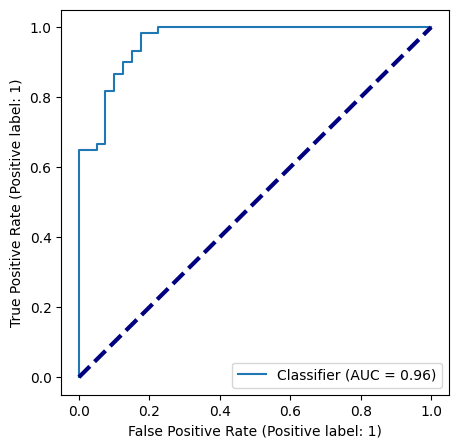

In [7]:
from sklearn.metrics import roc_curve, auc

...

fig, axs = plt.subplots(1, 1, figsize=(5,5))
...

# krzywa (diagonala) dla klasyfikatora losowo przypisującą kategorie -  najgorsze rozwiązanie
plt.plot([0, 1], [0, 1], color='navy', linewidth=3, linestyle='--')
plt.legend(loc="lower right");

print("AUC wynosi:","{:0.2f}".format(roc_auc))

## Modyfikacja modelu - wybór zmiennych wejściowych do modelu

**Proszę:** 

wykonać trening regresji logistycznej dla modelu, który używa wyniku tylko z jednego egzaminu i narysować na jednym rysunku krzywe ROC dla trzech wariantów:
* modelu używającego wyników z obu przedmiotów
* modelu używającego tylko wyników z matematyki
* modelu używającego tylko wyników z biologii

Krok 1: 

* przerobić funkcję ```leave_one_out_CV_with_prob``` tak by wykonywała obliczenia dla wszystkich trzech wariantów

Oczekiwany wynik:
```Python
   matematyka   biologia  wynik  model_prob  model_prob_matematyka  \
0    34.623660  78.024693      0    0.096879               0.132115   
1    30.286711  43.894998      0    0.000042               0.096571   
2    35.847409  72.902198      0    0.045566               0.143957   
3    60.182599  86.308552      1    0.990292               0.530217   
4    79.032736  75.344376      1    0.998192               0.839340   
..         ...        ...    ...         ...                    ...  


    model_prob_biologia  
0              0.816447  
1              0.276754  
2              0.750268  
3              0.875439  
4              0.765500  
..                  ...
```

In [8]:
%%time

def leave_one_out_CV_many_models(df, theta0, model):
    # macierz przechowująca prawdopodobieństwa dla modelu używającego wszystkich kolumn
    prob = np.array([])
    # macierz przechowująca prawdopodobieństwa dla modelu używającego tylko wyniki z matematyki
    prob_math = np.array([])
    # macierz przechowująca prawdopodobieństwa dla modelu używającego tylko wyniki z matematyki
    prob_biol = np.array([])
    # kopia oaryginalnych danych
    df_with_model = df.copy()
    
    for leave_out_index in df.index:
...
    # dodajemy wyniki modelu (prawdopodobienstwa) do calego DataFrame
    # i zwracamy DataFrame powiększone o kolumny z wynikami trzech modeli
    df_with_model["model_prob"] = prob
    df_with_model["model_prob_matematyka"] = prob_math
    df_with_model["model_prob_biologia"] = prob_biol
    return df_with_model
                        
theta0 = np.array([0,0,0])
model = logistic_func 
df_with_prob = leave_one_out_CV_many_models(df, theta0, model)
print(df_with_prob)

    matematyka   biologia  wynik  model_prob  model_prob_matematyka  \
0    34.623660  78.024693      0    0.096879               0.132115   
1    30.286711  43.894998      0    0.000042               0.096571   
2    35.847409  72.902198      0    0.045566               0.143957   
3    60.182599  86.308552      1    0.990292               0.530217   
4    79.032736  75.344376      1    0.998192               0.839340   
..         ...        ...    ...         ...                    ...   
95   83.489163  48.380286      1    0.850268               0.882310   
96   42.261701  87.103851      1    0.721421               0.191751   
97   99.315009  68.775409      1    0.999897               0.964477   
98   55.340018  64.931938      1    0.306822               0.429564   
99   74.775893  89.529813      1    0.999751               0.787323   

    model_prob_biologia  
0              0.816447  
1              0.276754  
2              0.750268  
3              0.875439  
4              0.

Krok 2:

* narysować na jednym rysunku krzywe ROC dla wszystkich trzech modeli

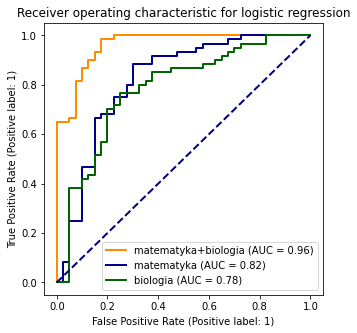

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(5,5))
lw = 2 #szerokosć linii - line width

...

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.title('Receiver operating characteristic for logistic regression');

# Zadanie domowe 

Zastosowanie regresji logistycznej do innego rodzaju danych

**Proszę:**

* narysować krzywą ROC dla modelu wytrenowanego na danych z pracy domowej z poprzednich ćwiczeń
* napisać funkcję ```logistic_func_1(theta, x)``` która będzie działać podobnie do oryginalnej, ale dodać w niej do oryginalnych danych 3 kolumny: kolumnę jedynek (tak jak poprzednio), kolumnę $x_{1}^2$, kolumnę $x_{2}^2$, gdzie $x_{1}$ i $x_{2}$ to wyniki z matematyki i biologii odpowiednio.
* użyć jej jako modelu podawanego do trenowania w funkcji ```leave_one_out_CV_with_prob(df, theta0, model)```
* narysować krzywą ROC dla nowego modelu

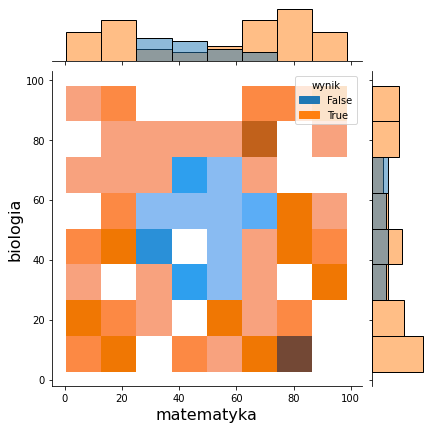

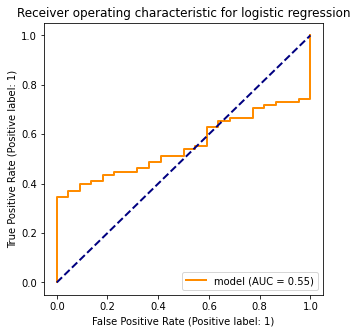

In [10]:
...
plt.title('Receiver operating characteristic for logistic regression')
plt.legend(loc="lower right");


CPU times: user 26.1 s, sys: 23.6 ms, total: 26.1 s
Wall time: 26.1 s


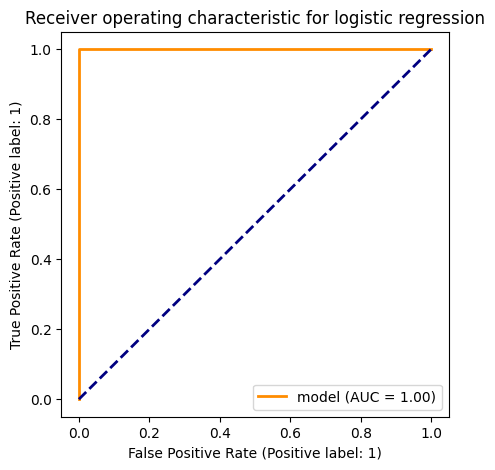

In [8]:
%%time

def logistic_func_1(theta, x):
...

theta0 = np.array([0,0,0,0,0])
model = logistic_func_1 
df_with_prob = leave_one_out_CV_with_prob(df, theta0, model)

...
plt.title('Receiver operating characteristic for logistic regression');
